In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, Normalize, LinearSegmentedColormap, TwoSlopeNorm
import seaborn as sns

In [2]:
# abrindo csv de dados
df = pd.read_csv('C:\IC\Scripts2\juncao.csv')

# criando coluna evento relacionando com a data
df['evento'] = pd.factorize(df['data'])[0] + 1
df 

,data,horario,latitude,longitude,chuva,1_1_1,1_1_14,1_1_16,1_1_2,1_1_3,...,3_7_6,3_8_1,3_8_14,3_8_16,3_8_2,3_8_3,3_8_4,3_8_5,3_8_6,evento
0,2016-01-16,0,-22.95,-44.65,3.031250,0.053589,9.223862,0.121261,2.851385,2.193081,...,2.066887,4.473000,5.661263,5.657595,6.717384,11.174793,5.411606,3.109451,2.662842,1
1,2016-01-16,0,-22.85,-44.25,5.359375,0.051115,3.580442,0.211135,1.378563,0.720869,...,1.108181,14.012810,9.136961,1.321850,3.284950,6.132926,5.121437,15.105503,4.790451,1
2,2016-01-16,0,-22.75,-44.25,4.796875,0.051115,3.580442,0.211135,1.378563,0.720869,...,4.100180,6.544037,12.097294,0.700738,2.744808,2.101976,15.729950,3.207768,4.873047,1
3,2016-01-16,0,-22.85,-44.45,3.921875,0.053589,9.223862,0.121261,2.851385,2.193081,...,4.458363,7.160961,8.111401,1.421642,1.724838,10.323914,5.811737,16.126057,1.888603,1
4,2016-01-16,0,-22.75,-44.35,5.000000,0.053589,9.223862,0.121261,2.851385,2.193081,...,2.272820,9.971779,9.060082,0.600858,1.640869,1.465084,11.705414,1.981527,9.920815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2021-10-28,24,-23.05,-44.45,23.843750,3.044645,5.110583,2.405196,1.084659,1.383622,...,6.781530,11.696135,32.294563,10.203670,3.148197,4.877701,4.539671,2.717007,6.641279,3
2096,2021-10-28,24,-23.05,-44.55,23.664062,3.044645,5.110583,2.405196,1.084659,1.383622,...,12.232957,15.046010,17.577991,17.981297,11.352683,10.388556,10.195740,3.419788,18.254883,3
2097,2021-10-28,24,-23.05,-44.65,21.648438,3.044645,5.110583,2.405196,1.084659,1.383622,...,34.518370,23.366398,52.114310,32.349693,16.000404,16.715681,23.661081,11.246054,20.713680,3
2098,2021-10-28,24,-23.15,-44.05,22.507812,0.292591,0.905154,0.682669,0.703982,0.720321,...,1.141704,5.764373,1.349619,2.746046,23.668863,1.844453,1.103312,2.175682,1.525050,3


In [3]:
# Separando as colunas de cada grade
colunas_grade1 = ['evento'] + df.columns[:5].to_list() + [coluna for coluna in df.columns[5:] if coluna[0] == '1']
colunas_grade2 = ['evento'] + df.columns[:5].to_list() + [coluna for coluna in df.columns[5:] if coluna[0] == '2']
colunas_grade3 = ['evento'] + df.columns[:5].to_list() + [coluna for coluna in df.columns[5:] if coluna[0] == '3']


# Criando os dataframes de cada grade
df_grade1 = df[colunas_grade1]
df_grade2 = df[colunas_grade2]
df_grade3 = df[colunas_grade3]

# display dos dataframes
df_grade1.loc[df_grade1['evento'] == 2] 

,evento,data,horario,latitude,longitude,chuva,1_1_1,1_1_14,1_1_16,1_1_2,...,1_7_5,1_7_6,1_8_1,1_8_14,1_8_16,1_8_2,1_8_3,1_8_4,1_8_5,1_8_6
700,2,2020-12-23,0,-22.95,-44.65,0.000000,1.560944,1.763882,21.239395,15.884865,...,4.879265,10.595367,1.393959,1.683067,6.381660,9.567192,1.413212,2.469662,3.444550,4.430340
701,2,2020-12-23,0,-22.85,-44.25,0.000000,0.691315,1.656622,3.710079,7.633038,...,3.722607,0.709099,0.604280,2.239399,1.876511,1.149813,1.397507,0.530106,2.755882,4.206173
702,2,2020-12-23,0,-22.75,-44.25,0.015625,0.691315,1.656622,3.710079,7.633038,...,3.722607,0.709099,0.604280,2.239399,1.876511,1.149813,1.397507,0.530106,2.755882,4.206173
703,2,2020-12-23,0,-22.85,-44.45,0.000000,1.560944,1.763882,21.239395,15.884865,...,4.879265,10.595367,1.393959,1.683067,6.381660,9.567192,1.413212,2.469662,3.444550,4.430340
704,2,2020-12-23,0,-22.75,-44.35,0.015625,1.560944,1.763882,21.239395,15.884865,...,4.879265,10.595367,1.393959,1.683067,6.381660,9.567192,1.413212,2.469662,3.444550,4.430340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2,2020-12-23,24,-23.05,-44.45,33.593750,3.682480,5.353573,89.148480,79.865340,...,19.297318,107.094610,11.610477,11.361752,24.608028,84.011980,3.293804,13.658571,13.631575,114.899475
1396,2,2020-12-23,24,-23.05,-44.55,44.289062,3.682480,5.353573,89.148480,79.865340,...,19.297318,107.094610,11.610477,11.361752,24.608028,84.011980,3.293804,13.658571,13.631575,114.899475
1397,2,2020-12-23,24,-23.05,-44.65,30.562500,3.682480,5.353573,89.148480,79.865340,...,19.297318,107.094610,11.610477,11.361752,24.608028,84.011980,3.293804,13.658571,13.631575,114.899475
1398,2,2020-12-23,24,-23.15,-44.05,15.789062,14.107240,4.213722,17.134127,108.344220,...,21.849342,68.765380,33.196490,15.709612,19.318394,108.159960,0.934166,4.836205,17.419083,49.287956


# Heatmap para cada Grade

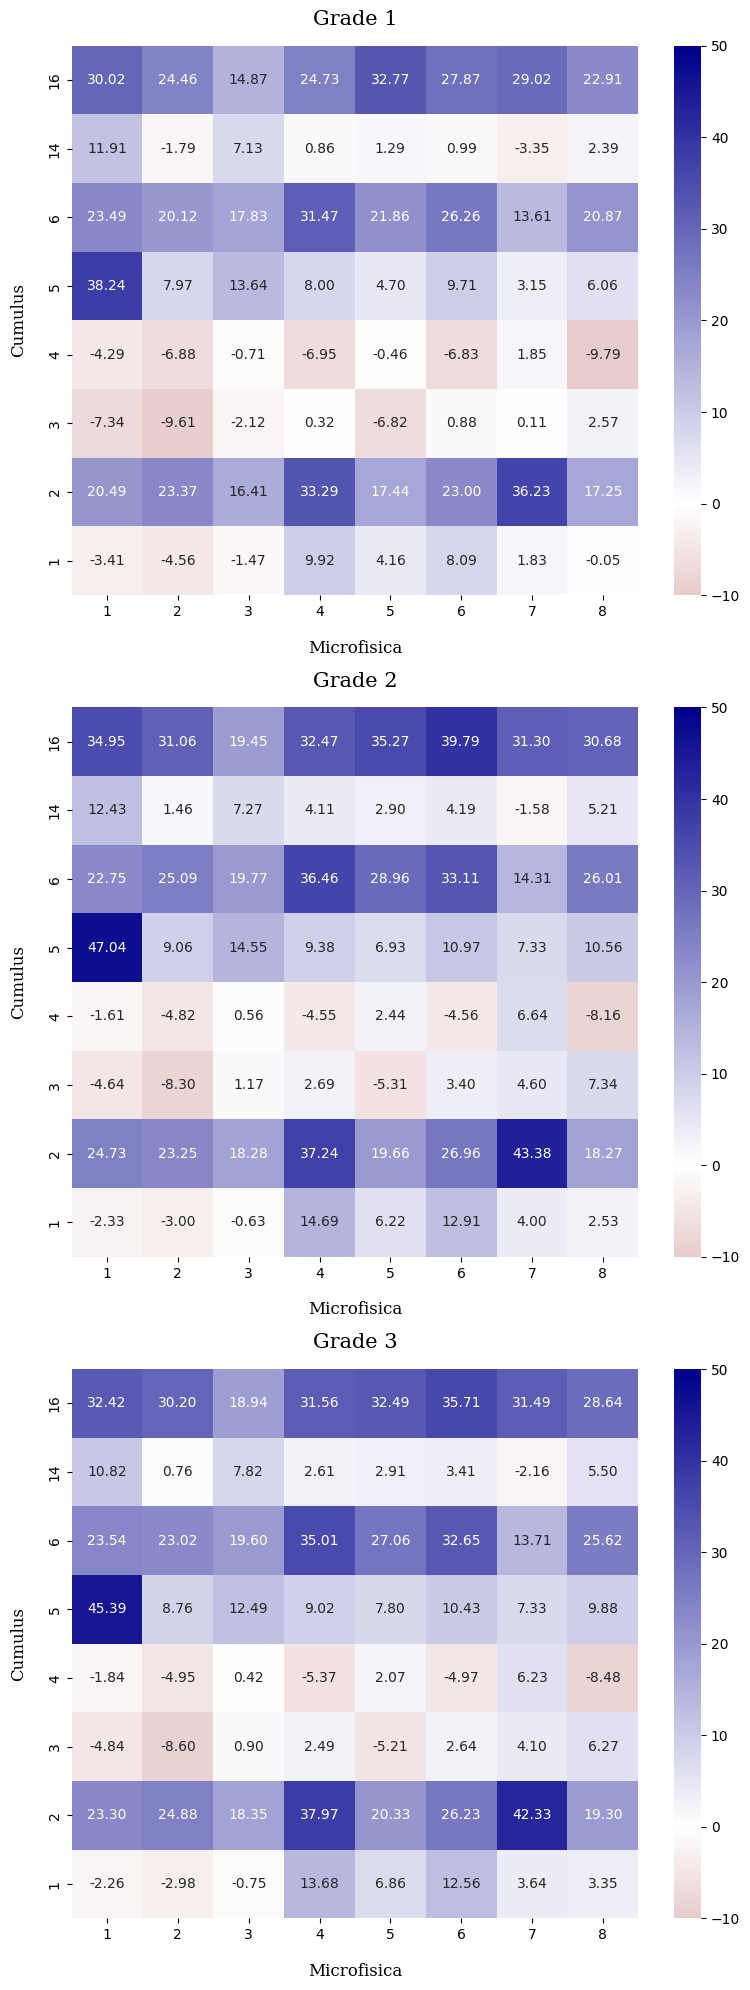

In [8]:
# Criando o colormap personalizado: Azul para negativo, Branco para zero e Vermelho para positivo
# colors = [
#     (0.0, '#08306b'),  # Azul escuro (valores mais negativos)
#     (0.4, '#deebf7'),  # Azul claro
#     (0.5, '#ffffff'),  # Branco (valor zero)
#     (0.6, '#fee0d2'),  # Vermelho claro
#     (1.0, '#a50f15')   # Vermelho escuro (valores mais positivos)
# ]

# Passo 1: Definir as cores do colormap
colors = [
    ("Darkred"), # Azul escuro
    ("white"),    # Branco
    ("Darkblue")   # Vermelho escuro
]

# Definindo o colormap azul-branco-vermelho
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)

# Definindo a norma para o colormap
# norm = TwoSlopeNorm(vmin=-10, vmax=50, vcenter=0)

# # Passo 3: Visualizar o colormap
# gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Gradiente para demonstração

# Criando a figura para o heatmap
fig, axes = plt.subplots(figsize = (8,20), nrows = 3, ncols = 1)

for grade, ax in zip(enumerate([df_grade1, df_grade2, df_grade3]), axes.flatten()):
    
    # Lista para armazenar as médias dos erros
    lista = []

    for evento in range(1, 4):

        # Guardando a grade para atualizar o dataframe
        df = grade[1]

        # Filtrando os eventos de cada grade
        df_evento = df.loc[df['evento'] == evento]

        # calculando a diferença entre as simulações WRF com a chuva MERGE
        df_erros = df_evento.iloc[: ,6:].subtract(df_evento['chuva'], axis=0)

        # calculando a média dos erros
        lista.append(df_erros.mean())

    # Concatenando as médias dos erros
    heatmap_wrf = pd.concat(lista, axis=1)

    # Calculando a média dos erros
    heatmap_wrf = heatmap_wrf.mean(axis = 1)

    # Resetando o index
    heatmap_wrf = heatmap_wrf.reset_index()

    # Renomeando as colunas
    heatmap_wrf.rename(columns = {'index': 'modelos', 0: 'media'}, inplace= True)

    # Separando as colunas
    heatmap_wrf['Microfisica'],heatmap_wrf['Cumulus'] = (heatmap_wrf['modelos'].apply(lambda x: x[2]), heatmap_wrf['modelos'].apply(lambda x : x[4:]))

    # Dropando a coluna modelos
    heatmap_wrf.drop(columns = ['modelos'],inplace = True)

    # Criando o heatmap
    heatmap_wrf = heatmap_wrf.pivot(index = 'Cumulus', columns = 'Microfisica', values = 'media')
    heatmap_wrf = heatmap_wrf.reindex(index = ['16','14','6','5','4','3','2','1'])
    
    sns.heatmap(heatmap_wrf, cmap = cmap, annot= True , fmt = '.2f', ax=ax, vmin=-10, center= 0, vmax=50)
    
    # Definindo o título
    ax.set_title(f'Grade {grade[0] + 1}', fontsize = 15, pad= 15, fontfamily = 'serif')

    # Configundo os eixos
    ax.set_xlabel('Microfisica', fontsize = 12, labelpad= 15, fontfamily = 'serif')
    ax.set_ylabel('Cumulus', fontsize = 12, labelpad= 15, fontfamily = 'serif')

    plt.tight_layout()
# plt.show()

# Heatmap geral

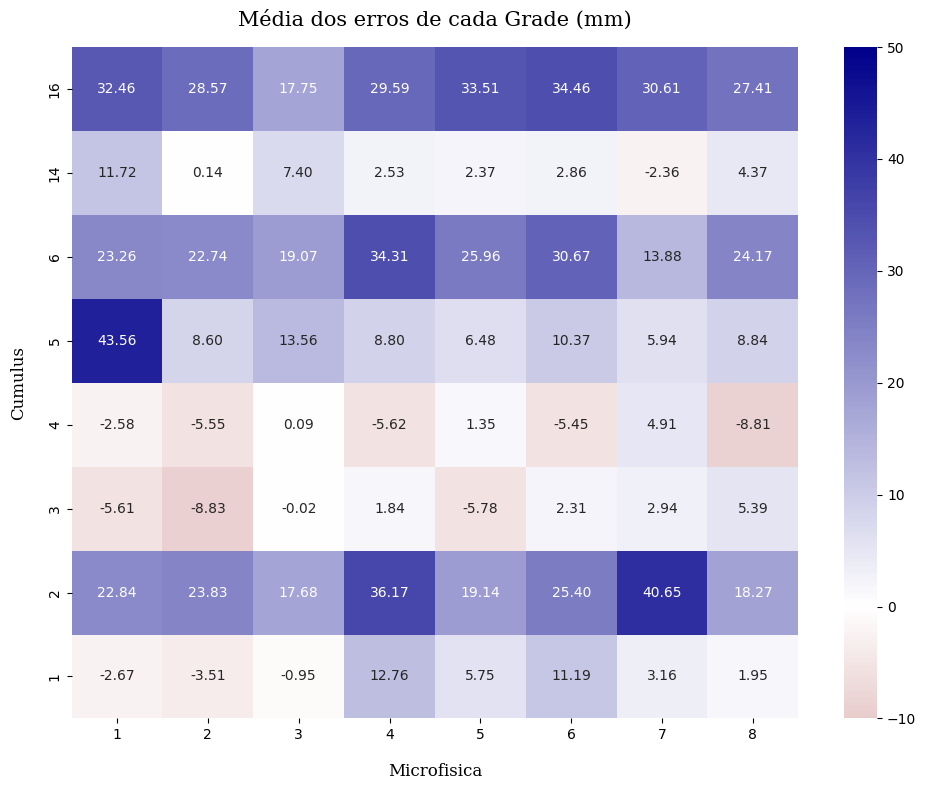

In [5]:
# Passo 1: Definir as cores do colormap
colors = [
    ("Darkred"), # Azul escuro
    ("white"),    # Branco
    ("Darkblue")   # Vermelho escuro
]

# Definindo o colormap azul-branco-vermelho
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)

# Criando a figura para o heatmap
fig, ax = plt.subplots(figsize = (10, 8))

# criando lista para armazenar os dataframes
dataframes = []

for grade in [df_grade1, df_grade2, df_grade3]:
    
    # Lista para armazenar as médias dos erros
    lista = []

    for evento in range(1, 4):

        # Guardando a grade para atualizar o dataframe
        df = grade

        # Filtrando os eventos de cada grade
        df_evento = df.loc[df['evento'] == evento]

        # calculando a diferença entre as simulações WRF com a chuva MERGE
        df_erros = df_evento.iloc[: ,6:].subtract(df_evento['chuva'], axis=0)

        # calculando a média dos erros
        lista.append(df_erros.mean())

    # Concatenando as médias dos erros
    dataframe_grade = pd.concat(lista, axis=1)

    # Calculando a média dos erros
    dataframe_grade = dataframe_grade.mean(axis = 1)

    # Resetando o index
    dataframe_grade = dataframe_grade.reset_index()

    # Salvando o dataframe na lista de dataframes
    dataframes.append(dataframe_grade)

# Concatenando os dataframes
heatmap_wrf = pd.concat(dataframes, axis = 1)

indice = heatmap_wrf.iloc[:,0]
heatmap_wrf.drop(columns = ['index'], inplace = True)

heatmap_wrf.index = indice

heatmap_wrf = heatmap_wrf.mean(axis = 1).reset_index()

# Renomeando as colunas
heatmap_wrf.rename(columns = {'index': 'modelos', 0: 'media'}, inplace= True)

# Separando as colunas
heatmap_wrf['Microfisica'],heatmap_wrf['Cumulus']  = (heatmap_wrf['modelos'].apply(lambda x: x[2]), heatmap_wrf['modelos'].apply(lambda x : x[4:]))

# Dropando a coluna modelos
heatmap_wrf.drop(columns = ['modelos'],inplace = True)

heatmap_wrf

# Criando o heatmap
heatmap_wrf = heatmap_wrf.pivot(index = 'Cumulus', columns = 'Microfisica', values = 'media')
heatmap_wrf = heatmap_wrf.reindex(index = ['16','14','6','5','4','3','2','1'])
sns.heatmap(heatmap_wrf, cmap = cmap, annot= True , ax=ax, fmt = '.2f', vmin= -10, vmax = 50, center=0)

# Definindo o título 
ax.set_title('Média dos erros de cada Grade (mm)', fontsize = 15, fontfamily = 'serif', pad= 15)

# Ajustando os labels
ax.set_xlabel('Microfisica', fontsize = 12, labelpad= 15, fontfamily = 'serif')
ax.set_ylabel('Cumulus', fontsize = 12, labelpad= 15, fontfamily = 'serif')

plt.tight_layout()

In [29]:
# criando uma lista qualquer com letras aleatórias
letras = ['a','b','c','d','e','f','g','h']
numeros = [1,2,3,4,5,6,7,8]


for numero, letra in zip(numeros, letras):
    print(numero)

letras

1
2
3
4
5
6
7
8


['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']